In [49]:
import numpy as np
import pandas as pd
import pickle
import xgboost as xgb
import matplotlib
import graphviz
from matplotlib import pyplot as plt

In [50]:

with open('model.pickle','rb') as f:
    model=pickle.load(f)

[02:05:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [51]:
rf=model['rf']
gbr=model['gbr']
xgbr=model['xgb']

In [52]:
# visualise decision trees

In [ ]:
fig, ax = plt.subplots(figsize=(100,500))
xgb.plot_tree(xgbr,num_trees=2,ax=ax)

In [26]:
from graphviz import Source
from sklearn import tree

In [34]:
from IPython.display import SVG
graph = Source(tree.export_graphviz(model['rf'].estimators_[0], out_file=None, feature_names=features))
SVG(graph.pipe(format='svg'))
graph.render('rf_render',view=True)

'rf_render.pdf'

In [45]:
graph = Source(tree.export_graphviz(model['gbr'].estimators_[0][0], out_file=None, feature_names=features))
SVG(graph.pipe(format='svg'))
graph.render('gbr_render',view=True)

'gbr_render.pdf'

In [41]:
features=['start_month','Age','Ward_Name','From_WardId','Ward_Service_Type','Ward_Location','Gender','TransferType']

<BarContainer object of 8 artists>

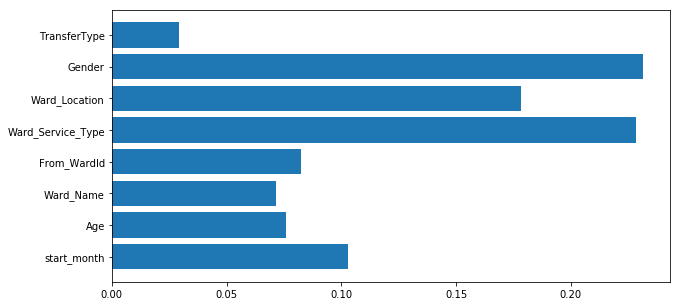

In [76]:
plt.figure(figsize=(10,5))
plt.barh(features,rf.feature_importances_)

<BarContainer object of 8 artists>

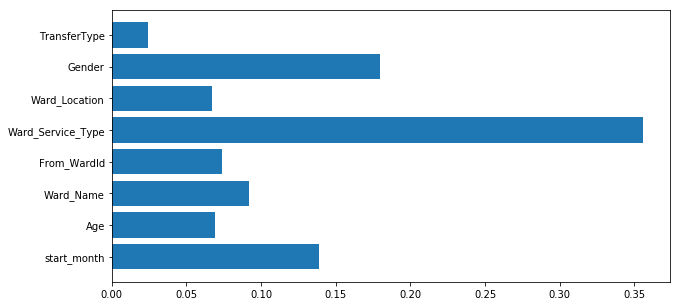

In [78]:
plt.figure(figsize=(10,5))
plt.barh(features,gbr.feature_importances_)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
xgb.plot_importance(xgbr,ax=ax,importance_type='gain')

In [64]:
ss={'From_WardId':[7],
       'TransferType':[15.0],
       'start_month':[5],
       'Ward_Name':[8],
       'Ward_Service_Type':[1],
       'Ward_Location':[6],
       'Age':[2],
       'Gender':[1]}

In [65]:
import pandas as pd
X=pd.DataFrame.from_dict(ss)

In [69]:
round(np.round(bst_xgb.predict(X),2)[0],2)

17.17

In [ ]:
df_wt=pd.read_csv('../ward_type.csv')

In [ ]:
df_wt.columns=df_wt.iloc[0]

In [ ]:
df_wt.drop(0,axis=0,inplace=True)

In [ ]:
df_wt[df_wt['Ward Name'=='Highcroft Site']]